In [60]:
# !pip install JPype1
# !pip install konlpy
# !pip install wordcloud
# !pip install nltk

In [4]:
with open('data-files/constitution.txt') as f:
    constitution = f.read()

In [6]:
constitution[:100]

'We the People of the United States, in Order to form a more perfect Union, establish Justice, insure'

In [9]:
from wordcloud import WordCloud

In [13]:
wc = WordCloud()
wc_model = wc.generate(constitution)

In [25]:
# wc_model.words_
wc_model.to_array().shape

(200, 400, 3)

In [16]:
import matplotlib.pyplot as plt

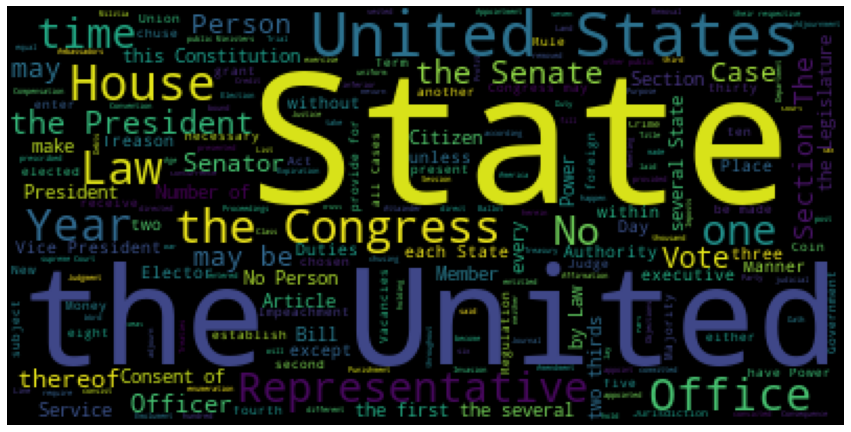

In [31]:
plt.figure(figsize=(15, 10))
plt.imshow(wc_model)
plt.axis("off")
plt.show()

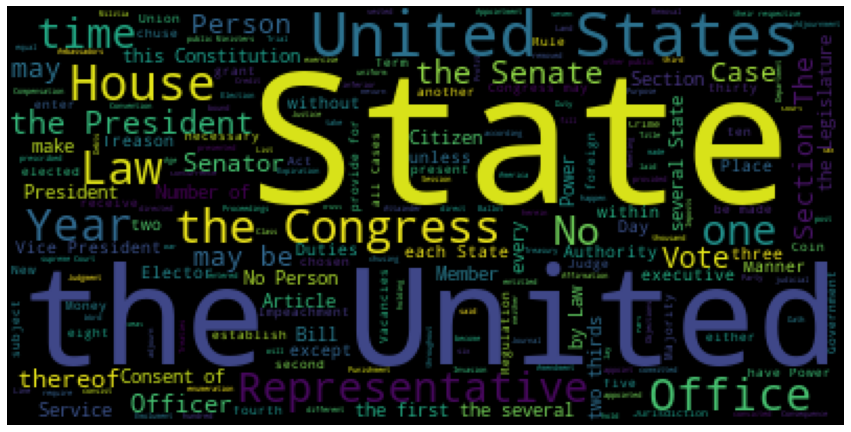

In [30]:
plt.figure(figsize=(15, 10))
plt.imshow(wc_model)
plt.axis("off")
plt.show()

In [32]:
from konlpy.corpus import kolaw

In [33]:
with kolaw.open('constitution.txt') as f:
    ko_constitution = f.read()

In [37]:
ko_constitution[:100]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'

In [38]:
from konlpy.tag import Twitter

In [39]:
t = Twitter() # 한글 사전 기반 형태소 분석기

In [46]:
ko_tokens = t.nouns(ko_constitution)
ko_tokens[:100]

one_word_token = []
for token in ko_tokens:
    if len(token) == 1 and token not in one_word_token:
        one_word_token.append(token)
# one_word_token

In [49]:
stop_words = \
    ['제','월','일','조','수','때','그','이','바','및','안', '것']
ko_tokens2 = \
    [ token for token in ko_tokens if token not in stop_words ]
# ko_tokens2

In [53]:
import numpy as np
import pandas as pd

In [58]:
tmp = np.unique(ko_tokens2, return_counts=True)
tmp_df = pd.DataFrame({ 'word': tmp[0], 'cnt': tmp[1] })
tmp_df.sort_values(by=["cnt"], ascending=False).head()

,word,cnt
302,법률,127
652,정,89
214,대통령,83
101,국가,73
122,국회,68


In [61]:
import nltk

In [100]:
ko_model = nltk.Text(ko_tokens2)
ko_model.vocab()
ko_data = ko_model.vocab().most_common(200)
ko_data[:10]

[('법률', 127),
 ('정', 89),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('관', 58),
 ('헌법', 53),
 ('모든', 37),
 ('위', 36)]

In [101]:
from PIL import Image

korea_map = Image.open('data-files/korea-map.jpg')
korea_map_array = np.array(korea_map)
korea_map_array.shape

(727, 489, 3)

In [102]:
ko_data_dict = dict(ko_data) # { 단어: 빈도수 }
wc = \
WordCloud(font_path=r"D:\bigdata-analysis\fonts\NanumGothic.ttf",
          mask=korea_map_array,
          background_color='white')
wc_model2 = wc.generate_from_frequencies(ko_data_dict)

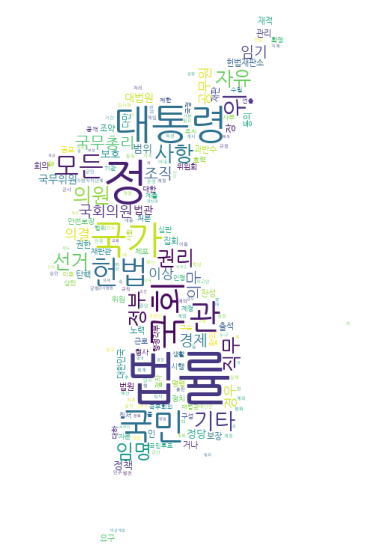

In [103]:
plt.figure(figsize=(15, 10))
plt.imshow(wc_model2)
plt.axis("off")
plt.show()